#**Interacting with HTML and Web APIs**

## Web Scrapping

###Introduction

What is web scraping?

Web Scraping is an amazing technique wherein you can get data from the internet just by typing a few lines of code.

We all know that all the data that is present in any website is simple HTML 

---

format data. Web scraping technique uses this HTML format data to extract information from the website and present it to the website. To Extract data from the website, we would be using beautifulSoup. BeautfiulSoup is a powerful Python library that helps to extract data from static HTML websites and stores it inside an object. We can then use this object to extract data

In [ ]:
#imports BeautifulSoup in your IDE or machine.
from bs4 import BeautifulSoup

Now since we are extracting data from a website, we need to hit that URL with a get request to get data. To do this we need the **request** library. To install the request library, just type the below command.

In [ ]:
import requests as request

###Getting Started With Web Scraping

Now that we imported both our libraries, let’s hit that URL and store the content of the page in the object.

In [ ]:
pageContent = request.get("https://www.worldometers.info/coronavirus/")
print(pageContent.status_code)

Q What does the status code 200 mean?

####**Status Code**

A status code defines the status of the request. On entering URL, a mistake can be typed in the URL, or there may be a server-side problem. Status code is used to know about what went wrong and where you made a mistake. There are different status codes, and each of the status codes has different meanings.

Let's see some standard status codes:

200: This code is used for a successful request.

201: For a successful request and data was created.

204: For empty response.

400: This is used for Bad Request. If you enter something wrong or you missed some required parameters, then the request would not be understood by the server, and you will get 400 status code.

401: This is used for Unauthorized Access. If the request authentication failed or the user does not have permissions for the requested operations, then you will get a 401 status code.

403: This is for Forbidden or Access Denied.

404: This will come if the Data Not Found.

500: This code is used for Internal Server Error.


Now, we will store this content in a beautifulSoup object. We need to tell beautifulSoup that this is HTML document content and we are storing it in an object. This allows us to use the functions of Web scraping provided by BeautifulSoup.

In [ ]:
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')

This stores the content of ContentPage in the beautifulSoupObject. The “html.parser” tells the beautifulSoupObjbect to parse this page content as HTML text. Let’s try to print it now.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
print(beautifulSoupObject)

The above output does not look pretty at all, and one cannot figure out what it means. Fortunately, you can prettify the data using .prettify() function of beautifulSoupObject. Just type beautifulSoupObject.prettify() and now print the data.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
print(beautifulSoupObject.prettify())

The output looks pretty now. It’s clean and one can figure out something from this data as well.

###Scraping the text Content From Website

The next thing we need to do is scrape the data. Let’s head over to the website.

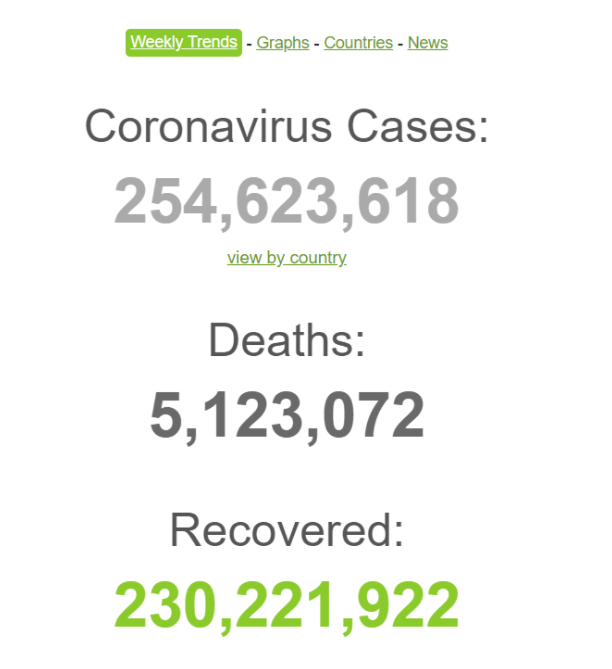

Now we can see the data we need to scrap. Right-click the mouse and click on Inspect Element.

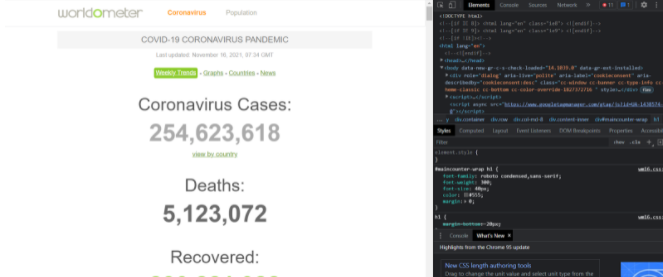

Now click on the arrow icon on the top left of Inspect Element box.

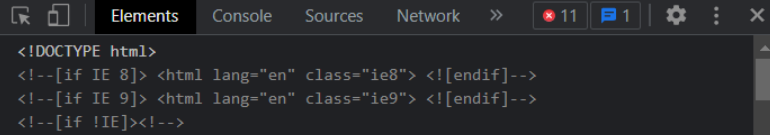

Click the top-left button. This will enable the HTML selection button. Now select the data on the page which you want to extract. In my case, I want to extract the total number of cases in the world.

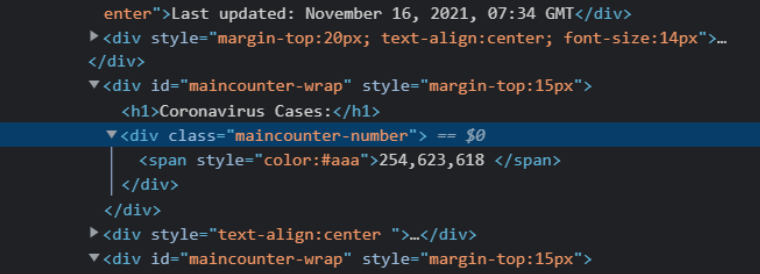

The selected HTML element tells me that there is a div with class “maincounter-number” which contains my data. Let’s try to extract the data from beautifulSoupObject. The find_all() function is a great function that helps to extract all HTML element that contains a given value. It takes an HTML element along with some attributes that tell it which class and id of div we need to select. Here it is visible that I need a div element with a class attribute of maincounter-number. Now let’s search it. We will store the result in a new Variable called mainCounterDiv.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
 
mainCounterDiv=beautifulSoupObject.find_all('div', attrs={"class":"maincounter-number"})
print(mainCounterDiv)

It provides us with a list of HTML elements. Now if we look at website data and mainCounterDiv data we can see that the first data of List is the number of Total Cases of Covid-19, the second data is the number of deaths that have occurred and the third data contains the value of total recovered cases. One problem is that the find function is returning the List of HTML elements, however, we need the text, so what to do. We can use the get_text() method of BeautifulSoup. It gets the data that is inside the HTML element rather than getting the whole HTML element, We will now create three variables and store text HTML elements in them. Let’s see how to do that.


In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
 
mainCounterDiv=beautifulSoupObject.find_all('div', attrs={"class":"maincounter-number"})
totalCases,totalDeaths,totalRecovered= mainCounterDiv[0].get_text().strip(), mainCounterDiv[1].get_text().strip(), mainCounterDiv[2].get_text().strip()
print(totalCases)
print(totalDeaths)
print(totalRecovered)

We have used .strip() function as well. This will help to remove any whitespace (if exists) in the HTML element. Upon printing these variables we will get these values.

###Scraping Table using BeautifulSoup

Now let us upgrade the task a little bit. Scrolling down the web page, you can see that there is a table, let us try to scrape that.

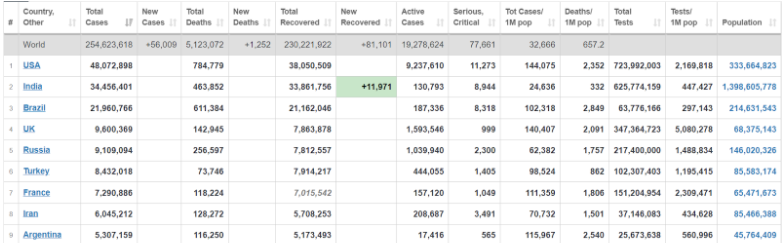

BeautifulSoup has an inbuilt function that allows the user to select an element just by specifying the element name. For example, let’s say that you want to scrape a table. Then you can simply type table in front of beauftifulSoupObject and it will get you the table.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table #get table on the page
print(mainTable)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

Now we have the table in front of us. Let us try to scrape the data from the table. We need rows and the body of the table for getting all the data. We will now scrape the mainTable content for heading rows and columns. Our table is now divided into two parts. The headings are denoted as tr and the rest is inside the tbody. Once we get the tbody, we need to extract all the tr present in tbody.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")

Printing the row will get us a list of all tr present in tbody as List.

Now we have the data but we need this in a list form. We can see that the contains many td. We will now find all td in the heading and store them in a List.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
print(mainHeading)

Now we will iterate the list and get all text data using the get_text() function. Then we will store these data in another text using another List.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
headingList=[]
for ele in mainHeading:
  headingList.append(ele.get_text().strip())
print(headingList)

Good, now we all heading to the table. Next, we will move on to the rows. The row variable in our code is a list that contains all the rows in the tbody. These rows in turn contain several table data in td elements. Now our work is to get all these data in the list. Now what we will do is we will iterate over row List. Now in each tr element in a row, we will find all td elements and store them in a list. Then we will iterate over the tdList and then store all the td data in a list. This way we will have a list of list containing all the data in the table.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
headingList=[]
for ele in mainHeading:
  headingList.append(ele.get_text().strip())
tableDataList = []
for ele in row:
  tdList = ele.find_all("td")
  tempList = []
  for data in tdList:
    tempList.append(data.get_text().strip())
  tableDataList.append(tempList)
print(tableDataList)

Upon printing tableDataList we will get the list of the list containing all the table data. Congratulations now, we have table heading and table data as well.

## Exercise 1: Scrapping wikipedia Article Using Requests Library and Python

#####Q1 Import requests library and check the status_Code 
of wikipedia article url https://en.wikipedia.org/wiki/Web_scraping

In [ ]:
'''
import requests

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
print(response.status_code)
'''

#####Q2 Inspect Wikipedia page and check ID of the title tag of the Article.

In [ ]:
'''
import requests
from bs4 import BeautifulSoup

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.string)
'''

#####Q3 Use beautiful soup to find all the <a> tags within the wiki article.

In [ ]:
'''
import requests
from bs4 import BeautifulSoup
import random

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.content)

# Get all the links
allLinks = soup.find(id="bodyContent").find_all("a")
random.shuffle(allLinks)
linkToScrape = 0

for link in allLinks:
	# We are only interested in other wiki articles
	if link['href'].find("/wiki/") == -1: 
		continue

	# Use this link to scrape
	linkToScrape = link
	break

print(linkToScrape)
'''

#####Q4 What is the difference between requests & BeautifulSoup library?
 

- Requests — A Python library used to send an HTTP request to a website and store the response object within a variable.
- BeautifulSoup — A Python library used to extract the data from an HTML or XML document.

#####Q5 Explain common status codes from series 2XX, 4XX, 5XX & find out the codes which occur because of failure from server side

Note - Failure from server side occurs when server fails to respond 

200: This code is used for a successful request.

201: For a successful request and data was created.

204: For empty response.

400: This is used for Bad Request. If you enter something wrong or you missed some required parameters, then the request would not be understood by the server, and you will get 400 status code.

401: This is used for Unauthorized Access. If the request authentication failed or the user does not have permissions for the requested operations, then you will get a 401 status code.

403: This is for Forbidden or Access Denied.

404: This will come if the Data Not Found.

500: This code is used for Internal Server Error.

Most of the response codes from 5XX series indicate to server failure

## Exercise 2

In [ ]:
#Create a varible html_doc.

html_doc = """
<html>
<head>
<meta http-equiv="Content-Type" content="text/html;
charset=iso-8859-1">
<title>An example of HTML page</title>
</head>
<body>
<h2>This is an example HTML page</h2>
<p>
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc at nisi velit,
aliquet iaculis est. Curabitur porttitor nisi vel lacus euismod egestas. In hac
habitasse platea dictumst. In sagittis magna eu odio interdum mollis. Phasellus
sagittis pulvinar facilisis. Donec vel odio volutpat tortor volutpat commodo.
Donec vehicula vulputate sem, vel iaculis urna molestie eget. Sed pellentesque
adipiscing tortor, at condimentum elit elementum sed. Mauris dignissim
elementum nunc, non elementum felis condimentum eu. In in turpis quis erat
imperdiet vulputate. Pellentesque mauris turpis, dignissim sed iaculis eu,
euismod eget ipsum. Vivamus mollis adipiscing viverra. Morbi at sem eget nisl
euismod porta.</p>
<p><a href="www.xyz.com" id="Link1">Link1</a></p>
<p><a href="www.pqr.com" id="Link2">Link2</a></p>
</body>
</html>
"""

In [ ]:
from bs4 import BeautifulSoup

#####Question1: Write a program to find the title tags from a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("Title of the document:")
print(soup.find("title"))
'''

#####Question2: Write a program to retrieve all the paragraph tags from a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("All paragraph tags:")
print(soup.find_all("p"))
'''

#####Question3: Write a program to get the number of paragraph tags of a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("Number of paragraph tags:")
print(len(soup.find_all("p")))
'''

#####Question4: Write a program to extract the text in the first paragraph tag of a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("The text in the first paragraph tag:")
print(soup.find_all('p')[0].text)
'''

#####Question5: Write a program to find the length of the text of the first ```<h2>``` tag of a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("Length of the text of the first <h2> tag:")
print(len(soup.find('h2').text))
'''

#####Question6: Write a Python program to find the text of the first ``` <a> ``` tag of a given html text.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("Text of the first <a> tag:")
print(soup.find('a').text)
'''

#####Question7: Write a Python program to find the href of the firstl ``` <a> ``` tag of a given html document.

In [ ]:
'''
soup = BeautifulSoup(html_doc, 'html.parser')
print("href of the first <a> tag:")
print(soup.find('a').attrs['href'])
'''

#Introduction to Simple Web Applications with Flask

##Creating a Flask app that serves HTML

**create a basic Flask app**

We'll start off with a boilerplate, one-file Flask app, i.e. just app.py. We won't worry yet about making multiple pages or multiple file.

See if you can create the boilerplate from memory:


```
from flask import Flask
app = Flask(__name__)

@app.route('/')
def homepage():
    return """
<!DOCTYPE html>
<head>
   <title>My title</title>
   <link rel="stylesheet" href="http://stash.compjour.org/assets/css/foundation.css">
</head>
<body style="width: 880px; margin: auto;">  
    <h1>Visible stuff goes here</h1>
    <p>here's a paragraph, fwiw</p>
    <p>And here's an image:</p>
    <a href="https://www.flickr.com/photos/zokuga/14615349406/">
        <img src="http://stash.compjour.org/assets/images/sunset.jpg" alt="it's a nice sunset">
    </a>
</body>
"""

if __name__ == '__main__':
    app.run(debug=True, use_reloader=True)
```

And switch to the command-line and get it running:



```
python app.py
```

Then visit 127.0.0.1:5000 (i.e. localhost:5000). This will runs our little pretty-HTML generating Flask app.



##Creating Multiple Routes and Dynamic Content in Flask

**Getting started**

At the end of this lesson, you'll be able to create an app that can respond to any arbitrary URL path:

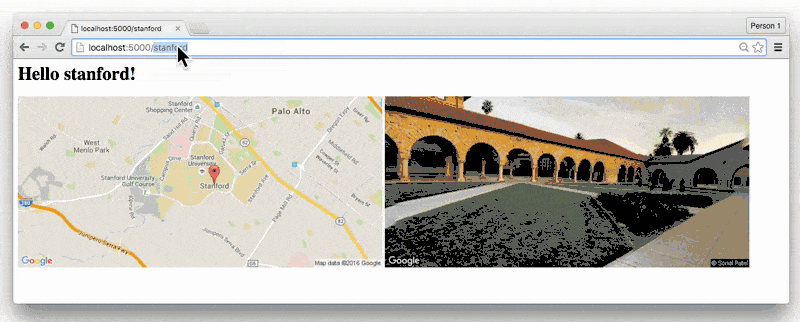

But first, let's revisit the app.py for the most basic Flask app. Try to rewrite it from scratch, just from memory:



```
from flask import Flask
app = Flask(__name__)

@app.route('/')
def homepage():
    return """<h1>Hello world!</h1>"""

if __name__ == '__main__':
    app.run(use_reloader=True)
```



**Creating multiple routes**

To add a new route, simply call the route() function again with the desired path and create a view function for it:



```
@app.route('/stanford')
def stanford_page():
    return """<h1>Hello stanford!</h1>"""
```

Just for fun, let's include a static Google Maps image of "stanford". This is the simplest call (by "call", I mean, URL, as that's how this particular API works) to the Google Static Map API that will return a map image with a marker placed at "stanford":

https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=stanford

Click on that URL to see the image that it generates – note that the URL takes you to an image file, not a HTML webpage that displays a map image.

While we're at it, let's add an image from Google's Street View service; here's the call to that API, according to the Street View Image API:

https://maps.googleapis.com/maps/api/streetview?size=700x300&location=stanford

Let's add both images to the HTML returned by view function binded to the /stanford path:



```
@app.route('/stanford')
def stanford_page():
    return """
      <h1>Hello stanford!</h1>

      <img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=stanford" alt="map of stanford">
  
      <img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=stanford" alt="street view of stanford">
    """
```

The resulting page when visiting http://localhost:5000/stanford looks like:

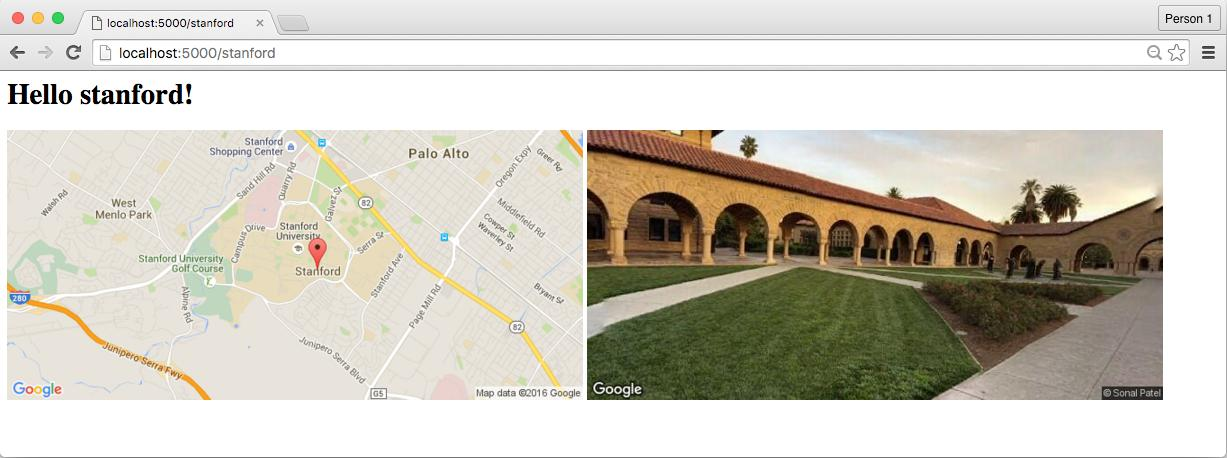





**Making even more routes**

But what if we wanted to create a paths for other locations, such as newyork and tokyo? Well, there's always copy and paste:



```
@app.route('/stanford')
def stanford_page():
    return """
      <h1>Hello stanford!</h1>

      <img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=stanford" alt="map of stanford">
  
      <img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=stanford" alt="street view of stanford">
    """

@app.route('/newyork')
def newyork_page():
    return """
      <h1>Hello newyork!</h1>

      <img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=newyork" alt="map of newyork">
  
      <img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=newyork" alt="street view of newyork">
      """
@app.route('/tokyo')
def tokyo_page():
    return """
      <h1>Hello tokyo!</h1>

      <img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=tokyo" alt="map of tokyo">
  
      <img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=tokyo" alt="street view of tokyo">
    """
```

Here's what http://127.0.0.1/newyork looks like:
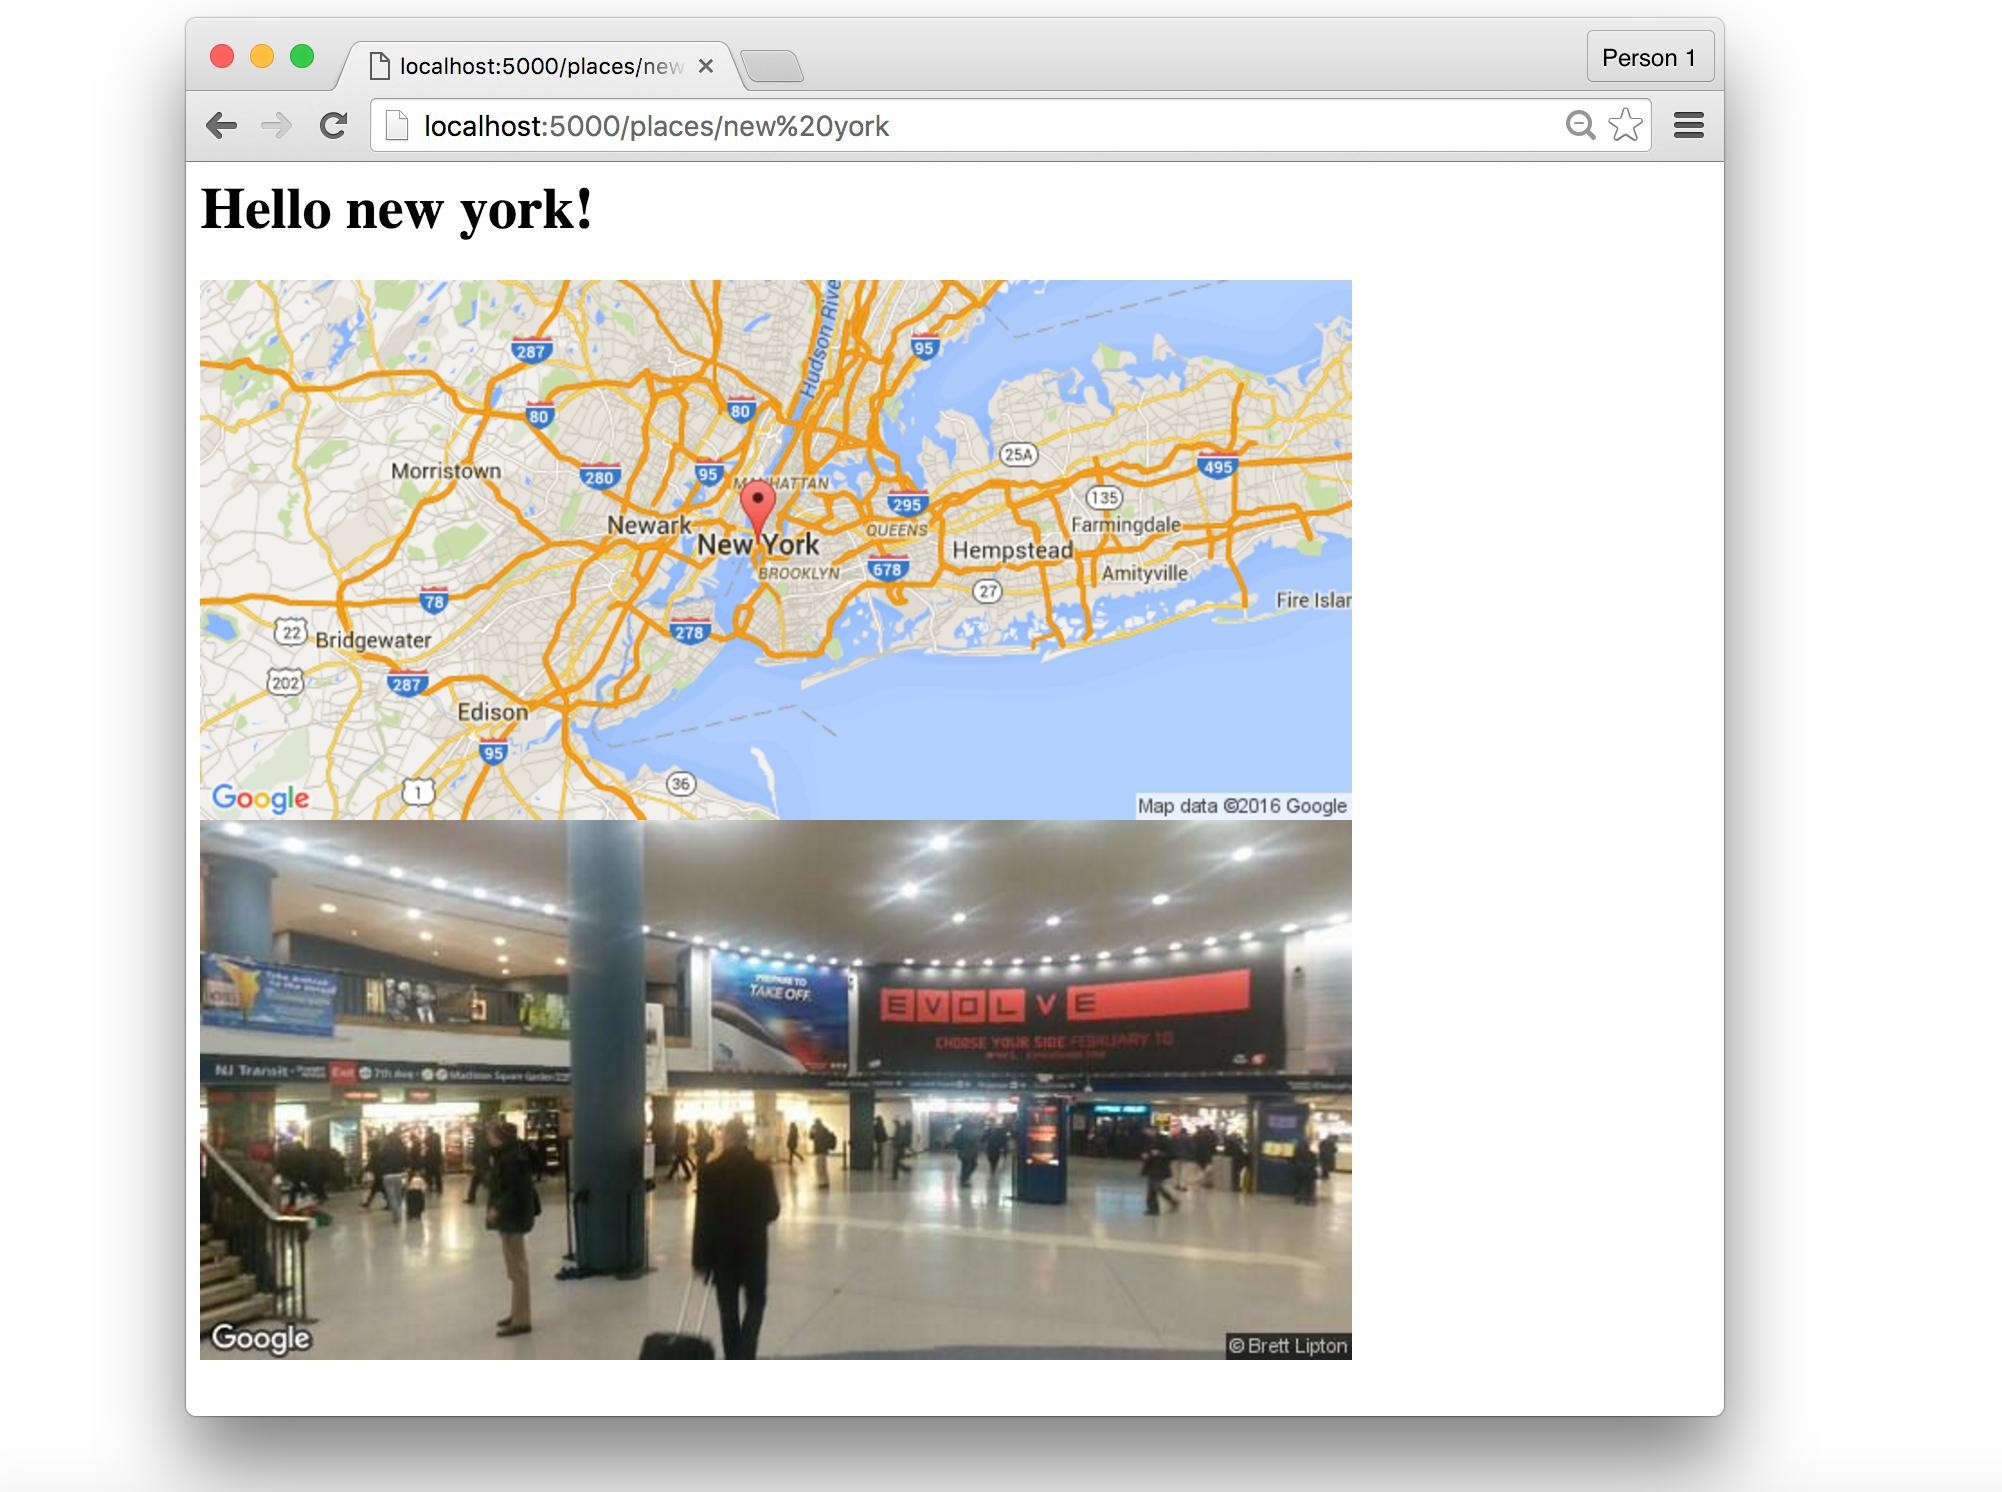


Creating routes with variables
Of course, it's just not feasible for you, the developer, to enumerate every possible route that a user will want to try out, whether it be stanford or chicago or timbuktu.

This is where we get into the core of what makes a web application different from a regular web page: we program our app to accept variable paths.

We already have 95% of the process abstracted. Remember that we started out with a view function that looked like this:


```
@app.route('/stanford')
def stanford_page():
    return """
      <h1>Hello stanford!</h1>

      <img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=stanford" alt="map of stanford">
  
      <img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=stanford" alt="street view of stanford">
    """
```

And now it looks like this:

```
@app.route('/stanford')
def stanford_page():
    return(HTML_TEMPLATE.substitute(place_name='stanford'))
```

Now we have to abstract the parts of the routing function and view function that explicitly refer to stanford…In pseudocode, it might look something like this:

```
@app.route('/SOME_PLACE')
def some_place_page():
    return(HTML_TEMPLATE.substitute(place_name=SOME_PLACE))
```

In fact, that pseudocode is very close to what Flask requires; from its Quickstart documentation on variable rules:

To add variable parts to a URL you can mark these special sections as . Such a part is then passed as a keyword argument to your function.

Here's what that abstracted route/view function can look like; notice what stays the same and what changes:

```
@app.route('/<some_place>')
def some_place_page(some_place):
    return(HTML_TEMPLATE.substitute(place_name=some_place))
```

Delete the code regarding the /stanford, /newyork, and other routes (although you should leave the Hello World for /, just to have a page for the root homepage route). We don't need it now. This is what the entire app looks like:

```
from flask import Flask
from string import Template
app = Flask(__name__)

HTML_TEMPLATE = Template("""
<h1>Hello ${place_name}!</h1>

<img src="https://maps.googleapis.com/maps/api/staticmap?size=700x300&markers=${place_name}" alt="map of ${place_name}">

<img src="https://maps.googleapis.com/maps/api/streetview?size=700x300&location=${place_name}" alt="street view of ${place_name}">
""")

@app.route('/')
def homepage():
    return """<h1>Hello world!</h1>"""

@app.route('/<some_place>')
def some_place_page(some_place):
    return(HTML_TEMPLATE.substitute(place_name=some_place))

if __name__ == '__main__':
    app.run(debug=True, use_reloader=True)
Now, put any name you'd like in your web app's path, e.g. http://127.0.0.1/chicago, http://127.0.0.1/hong+kong, http://127.0.0.1/moscow, http://127.0.0.1/zimbabwe
```

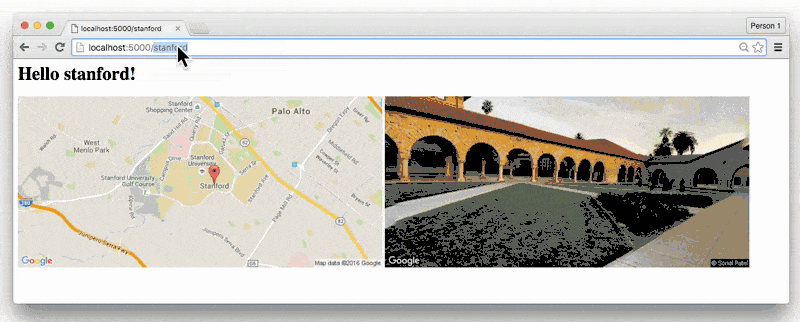

#####Q1 Make a sample mailing service using Flask

In [ ]:
"""
Solution
"""
from flask_mail import Mail, Message
from flask import Flask
 
app = Flask(__name__)
mail = Mail(app)
 
@app.route(“/mail”)
def email():
    msg = Message( “Hello Message”, sender=”admin@test.com”, recipients=[“to@test.com”])
   mail.send(msg)

#####Q2 What is WSGI?

"""
Solution
"""

WSGI stands for the Web Server Gateway Interface. It is a Python standard defined in PEP 3333. WSGI is pronounced as “Whiskey.” It is a specification that describes how a web server communicates with a web application.

#####Q3 How to change default host and port in Flask?

In [ ]:
"""
Solution
"""

from flask import Flask
app = Flask(__name__)
 
@app.route("/")
def index():
    return "Hello, World!"
 
if __name__ == "__main__":
    app.run(host="0.0.0.0", port=8080)

#####Q4 How to get query String in Flask?

In [ ]:
"""
Solution
"""
from flask import Flask
from flask import request
 
app = Flask(__name__)
 
@app.route("/")
def index():
val = request.args.get("var") 
 
return "Hello, World! {}".format(val)
 
if __name__=="__main__":
app.run(host="0.0.0.0", port=8080)

#####Q5 How to get the user agent in Flask?

In [ ]:
"""
Solution
"""
from flask import Flask
from flask import request
 
app = Flask(__name__)
 
@app.route("/")
def index():
    val = request.args.get("var")
    user_agent = request.headers.get('User-Agent')   
 
    response = """
    Hello, World! {}
    You are accessing this app with {}
    """.format(val, user_agent)    
return response
if __name__=="__main__":
    app.run(host="0.0.0.0", port=8080)